In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train1=pd.read_csv('train.csv')

In [3]:
train1.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [4]:
campaign=pd.read_csv('campaign_data.csv')

In [5]:
test_1=pd.read_csv('test_QyjYwdj.csv')

In [6]:
coupon=pd.read_csv('coupon_item_mapping.csv')

In [7]:
customer=pd.read_csv('customer_demographics.csv')

In [8]:
transaction=pd.read_csv('customer_transaction_data.csv')

In [9]:
items=pd.read_csv('item_data.csv')

In [146]:
customer.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


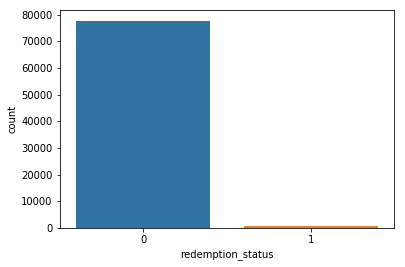

In [21]:
sns.countplot(train1.redemption_status)

In [22]:
train1.shape


(78369, 5)

In [561]:
# merging train and campaign
merged_train=pd.merge(train1,campaign,on='campaign_id',how='left')

In [562]:
merged_train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,6,9,635,205,0,Y,11/03/13,12/04/13
3,7,13,644,1050,0,X,19/05/13,05/07/13
4,9,8,1017,1489,0,X,16/02/13,05/04/13


In [563]:
merged_train.shape, train1.shape

((78369, 8), (78369, 5))

In [564]:
#merging merged and coupon
merged_train=pd.merge(merged_train,coupon,on='coupon_id',how='left')

In [565]:
#merging merged with customer, transaction, items
merged_train=pd.merge(merged_train,customer,on='customer_id',how='left')


In [566]:
merged_train=pd.merge(merged_train,items,on='item_id',how='left')

In [567]:
merged_train.isnull().sum()

id                         0
campaign_id                0
coupon_id                  0
customer_id                0
redemption_status          0
campaign_type              0
start_date                 0
end_date                   0
item_id                    0
age_range            2612838
marital_status       2612838
rented               2612838
family_size          2612838
no_of_children       2612838
income_bracket       2612838
brand                      0
brand_type                 0
category                   0
dtype: int64

In [579]:
merged_train=merged_train.drop(['age_range','marital_status','rented','family_size','no_of_children','income_bracket'],axis=1)  

In [580]:
merged_train=merged_train.drop(['start_date','end_date'],axis=1)  

In [581]:
merged_train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,item_id,brand,brand_type,category
0,1,13,27,1053,0,X,24775,1636,Established,Grocery
1,1,13,27,1053,0,X,14958,1636,Established,Grocery
2,1,13,27,1053,0,X,40431,1636,Established,Grocery
3,1,13,27,1053,0,X,20749,1636,Established,Grocery
4,1,13,27,1053,0,X,56860,1636,Established,Grocery


In [582]:
merged_train.nunique()

id                   78369
campaign_id             18
coupon_id              866
customer_id           1428
redemption_status        2
campaign_type            2
item_id              32800
brand                 2461
brand_type               2
category                17
dtype: int64

In [583]:
transaction_grouped=transaction.groupby('customer_id').sum()[['quantity','selling_price','other_discount','coupon_discount']].reset_index()

In [584]:
merged_train=merged_train.merge(transaction_grouped,on='customer_id',how='left')

In [585]:
df1=merged_train.groupby(['customer_id']).mean()[['quantity','selling_price','other_discount','coupon_discount']].reset_index()

In [587]:
merged_train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,item_id,brand,brand_type,category,quantity,selling_price,other_discount,coupon_discount
0,1,13,27,1053,0,X,24775,1636,Established,Grocery,105551,57120.75,-10282.37,-89.05
1,1,13,27,1053,0,X,14958,1636,Established,Grocery,105551,57120.75,-10282.37,-89.05
2,1,13,27,1053,0,X,40431,1636,Established,Grocery,105551,57120.75,-10282.37,-89.05
3,1,13,27,1053,0,X,20749,1636,Established,Grocery,105551,57120.75,-10282.37,-89.05
4,1,13,27,1053,0,X,56860,1636,Established,Grocery,105551,57120.75,-10282.37,-89.05


In [588]:
df2=merged_train.groupby(['id','campaign_id','coupon_id','customer_id']).mean().reset_index()[['customer_id','campaign_id','coupon_id','quantity','selling_price','other_discount','coupon_discount','redemption_status']]

In [589]:
df2.head()

,customer_id,campaign_id,coupon_id,quantity,selling_price,other_discount,coupon_discount,redemption_status
0,1053,13,27,105551.0,57120.75,-10282.37,-89.05,0.0
1,48,13,116,12143.0,90185.10,-10664.18,-1237.79,0.0
2,205,9,635,1351.0,117461.66,-17261.79,-2145.72,0.0
3,1050,13,644,306.0,23291.42,-3947.37,-178.10,0.0
4,1489,8,1017,139063.0,67797.49,-11534.90,-265.01,0.0


In [590]:
df2.shape

(78369, 8)

In [591]:
merged_train.head(1)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,item_id,brand,brand_type,category,quantity,selling_price,other_discount,coupon_discount
0,1,13,27,1053,0,X,24775,1636,Established,Grocery,105551,57120.75,-10282.37,-89.05


In [592]:
finaltrain=merged_train.groupby(['id','campaign_id','coupon_id','customer_id']).agg({'quantity':'mean','selling_price':'mean','other_discount':'mean','coupon_discount':'mean','brand_type':'first','brand':'first','category':'first','campaign_type':'first','redemption_status':'first'}).reset_index()

In [210]:
coupons=items.merge(coupon,on='item_id',how='inner')

In [593]:
finaltrain.head()

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount,brand_type,brand,category,campaign_type,redemption_status
0,1,13,27,1053,105551,57120.75,-10282.37,-89.05,Established,1636,Grocery,X,0
1,2,13,116,48,12143,90185.10,-10664.18,-1237.79,Local,56,Grocery,X,0
2,6,9,635,205,1351,117461.66,-17261.79,-2145.72,Established,560,Pharmaceutical,Y,0
3,7,13,644,1050,306,23291.42,-3947.37,-178.10,Established,611,Grocery,X,0
4,9,8,1017,1489,139063,67797.49,-11534.90,-265.01,Established,1558,Grocery,X,0


In [485]:
customer.no_of_children.fillna(0,inplace=True)

In [540]:
Single=customer.marital_status[customer.family_size=='1'].replace(np.NaN,'Single')

In [546]:
Married=customer.marital_status[(customer.family_size=='2') |(customer.family_size=='3')|(customer.family_size=='4')|(customer.family_size=='5+')].fillna('Married')

In [552]:
marital_status=pd.concat((Single,Married),axis=0)

In [557]:
M=marital_status.sort_index()

In [560]:
customer.isnull().sum()

customer_id       0
age_range         0
marital_status    0
rented            0
family_size       0
no_of_children    0
income_bracket    0
dtype: int64

In [677]:
finaltrain_1=finaltrain

In [679]:
mergedd=finaltrain_1.merge(customer,on='customer_id',how='left')

In [708]:
mergedd.income_bracket.fillna(5.0,inplace=True)

TEST SET

In [249]:
merged_test=pd.merge(merged_test,coupon,on='coupon_id',how='left')

In [244]:
merged_test=pd.merge(test_1,campaign,on='campaign_id',how='left')

In [245]:
merged_test=pd.merge(merged_test,customer,on='customer_id',how='left')


In [250]:
merged_test=pd.merge(merged_test,items,on='item_id',how='left')

In [253]:
merged_test=merged_test.drop(['age_range','marital_status','rented','family_size','no_of_children','income_bracket'],axis=1)  

In [255]:
merged_test=merged_test.drop(['start_date','end_date'],axis=1)  

In [258]:
merged_test=merged_test.merge(transaction_grouped,on='customer_id',how='left')

In [315]:
test_prepared=merged_test.groupby(['id','campaign_id','coupon_id','customer_id']).mean().reset_index()[['customer_id','campaign_id','coupon_id','quantity','selling_price','other_discount','coupon_discount']]

In [376]:
finaltest=merged_test.groupby(['id','campaign_id','coupon_id','customer_id']).agg(
    {'quantity':'mean','selling_price':'mean','other_discount':'mean','coupon_discount':'mean',
     'brand_type':'first','brand':'first','category':'first','campaign_type':'first'}

).reset_index()

In [377]:
finaltest.shape

(50226, 12)

In [316]:
test_prepared.shape

(50226, 7)

In [317]:
df2.shape

(78369, 8)

In [711]:
finaltest_1=finaltest

In [712]:
mergedd_test=finaltest_1.merge(customer,on='customer_id',how='left')

In [734]:
mergedd_test.head()

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount,brand_type,brand,category,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,3,22,869,967,16644,156733.77,-16292.99,-2111.86,Established,1075,Grocery,X,36-45,Single,0.0,1,0,5.0
1,4,20,389,1566,282396,297070.87,-32760.94,-1489.97,Established,57,Pharmaceutical,Y,26-35,Married,0.0,2,0,9.0
2,5,22,981,510,181500,161811.27,-39450.39,-2384.75,Established,1335,Grocery,X,26-35,Married,0.0,2,1,1.0
3,8,25,1069,361,22196,49149.16,-7705.95,0.00,Established,1996,Grocery,Y,18-25,Single,0.0,1,0,3.0
4,10,17,498,811,1729,117044.09,-19214.01,-89.04,Established,209,Grocery,Y,46-55,Married,0.0,2,0,5.0


In [735]:
mergedd.head()

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount,brand_type,brand,category,campaign_type,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,105551,57120.75,-10282.37,-89.05,Established,1636,Grocery,X,0,46-55,Single,0.0,1,0,5.0
1,2,13,116,48,12143,90185.10,-10664.18,-1237.79,Local,56,Grocery,X,0,36-45,Married,0.0,2,0,3.0
2,6,9,635,205,1351,117461.66,-17261.79,-2145.72,Established,560,Pharmaceutical,Y,0,46-55,Married,0.0,2,0,7.0
3,7,13,644,1050,306,23291.42,-3947.37,-178.10,Established,611,Grocery,X,0,46-55,Married,0.0,2,0,5.0
4,9,8,1017,1489,139063,67797.49,-11534.90,-265.01,Established,1558,Grocery,X,0,46-55,Married,0.0,2,0,3.0


# Encoding

In [392]:
finaltrain.head(1)

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount,brand_type,brand,category,campaign_type,redemption_status
0,1,13,27,1053,105551,57120.75,-10282.37,-89.05,Established,1636,Grocery,X,0


In [756]:
from sklearn.preprocessing import LabelEncoder

In [758]:
lr=LabelEncoder()

In [760]:
age_range=lr.fit_transform(mergedd.age_range)

In [765]:
mergedd.age_range=age_range

In [768]:
age_range_test=lr.fit_transform(mergedd_test.age_range)

In [772]:
mergedd_test.age_range=age_range_test

In [757]:
marital_status=pd.get_dummies(mergedd.marital_status,drop_first=True)

In [393]:
brand_type=pd.get_dummies(mergedd.brand_type,drop_first=True)
category=pd.get_dummies(mergedd.category,drop_first=True)
campaign_type=pd.get_dummies(mergedd.campaign_type,drop_first=True)

In [773]:
finaltrain_enc_all=pd.concat((mergedd,brand_type,category,campaign_type,marital_status),axis=1)
finaltrain_enc_all.drop(['brand_type','category','campaign_type','marital_status'],axis=1,inplace=True)

In [778]:
marital_status_test=pd.get_dummies(mergedd_test.marital_status,drop_first=True)

In [779]:
brand_type=pd.get_dummies(mergedd_test.brand_type,drop_first=True)
category=pd.get_dummies(mergedd_test.category,drop_first=True)
campaign_type=pd.get_dummies(mergedd_test.campaign_type,drop_first=True)

finaltest_enc_all=pd.concat((mergedd_test,brand_type,category,campaign_type,marital_status_test),axis=1)
finaltest_enc_all.drop(['brand_type','category','campaign_type','marital_status'],axis=1,inplace=True)



In [398]:
finaltest_enc.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'brand', 'Local',
       'Dairy, Juices & Snacks', 'Flowers & Plants', 'Grocery', 'Meat',
       'Natural Products', 'Packaged Meat', 'Pharmaceutical', 'Prepared Food',
       'Seafood', 'Skin & Hair Care', 'Y'],
      dtype='object')

In [401]:
finaltrain_enc.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'brand',
       'redemption_status', 'Local', 'Dairy, Juices & Snacks',
       'Flowers & Plants', 'Grocery', 'Meat', 'Natural Products',
       'Packaged Meat', 'Pharmaceutical', 'Prepared Food', 'Salads', 'Seafood',
       'Skin & Hair Care', 'Y'],
      dtype='object')

In [829]:
y=finaltrain_enc.redemption_status
X=finaltrain_enc.drop(['redemption_status','Salads'],axis=1)

# Prediction

In [817]:
from sklearn.ensemble import GradientBoostingClassifier

In [830]:
gbc=GradientBoostingClassifier(n_estimators=1000,random_state=123,learning_rate=0.42) # gives best prediction 0.8492

In [831]:
gbc.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.42, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [833]:
predictedgbc=gbc.predict_proba(finaltest_enc)

In [795]:
predictedgbc.shape

(50226, 2)

In [834]:
submission_gbc=pd.DataFrame({'id':test_1.id,'redemption_status':predictedgbc[:,1:].ravel()})

In [835]:
submission_gbc.to_csv('submission_gbc.csv',index=False)